# <div align="center">API WEB : Openrouteservice</div>

## I] API

API signifie "Application Programming Interface". En d'autres termes, c'est un moyen mis en place par une application pour que d'autres applications puissent intéragir simplement avec elle. Tout comme les bibliothèques, il existe de très nombreuses API. Nous allons nous intéresser plus particulièrement l'API Openrouteservice. Il s'agit d'un service de routage basé sur les données ouvertes OpenStreetMap.


## II] Utilisation de l'API 

Prenons un exemple de la vie courante : "Nous cherchons un appartement situé à chaumont situé à moins de 30 minutes à pieds du centre". Pour cela, nous allons tracer des isochrones sur une plage de 5 min à partir de la mairie.

**Remarque** : une isochrone est une ligne situé à une distance ou à un temps donné d'un point origine  

Dans un premier temps, on peut se familiariser avec les fonctionnalités disponibles sur le <a href="http://maps.openrouteservice.org/reach">site </a> internet proposant l'API. Le menu à gauche permet de saisir et d'exploiter différents options.

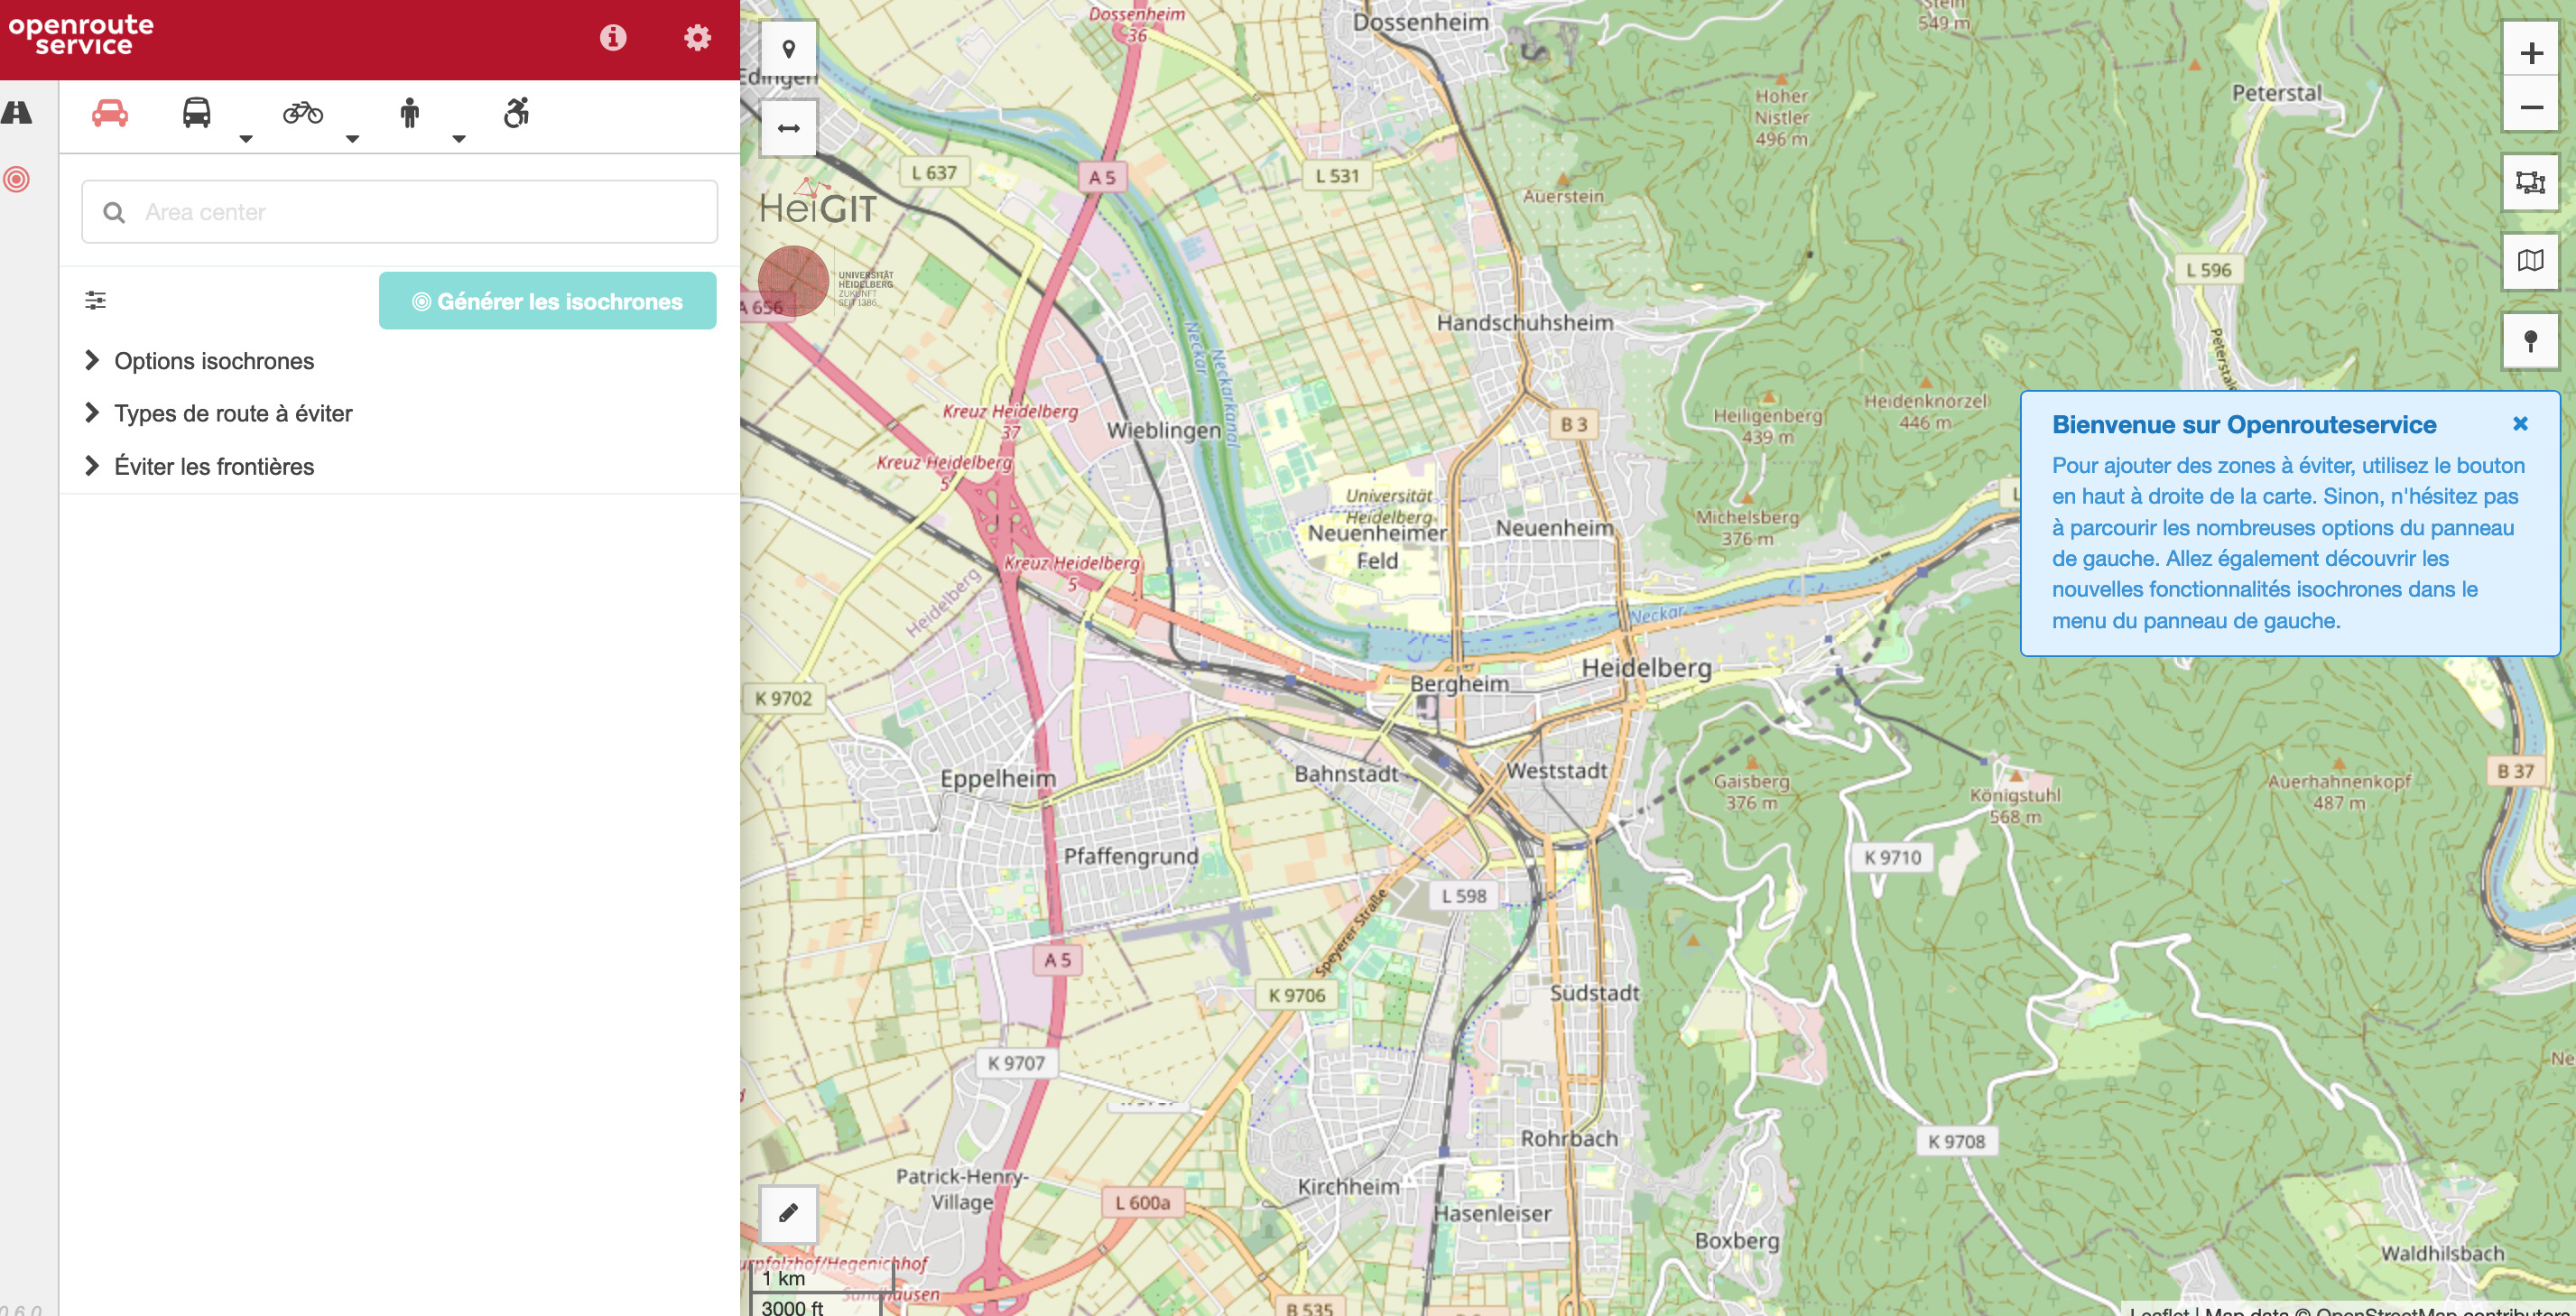

Pour poursuivre , il faut créer un compte sur le site www.openrouteservice.org afin d'obtenir une clé permettant d'utiliser l'API.

Maintenant, il faut se familiariser directement avec les paramètres de l'API via l'interface : 
https://openrouteservice/dev/#/api-docs/v2/isochrones/{profiles}/post

Après avoir analysé tout cela,et notamment la rubrique "Show example code", et sélectionné la catégorie Python, on s'aperçoit qu'on peut utliser cette API via l'envoie d'un formulaire HTML contenant les paramètres fixés dans un dictionnaire qui représente une structure de données JSON. Une fois ce formulaire envoyé, on obtient en retour  une réponse également sous la forme de données JSON.  Il faut donc être capable d'envoyer une requête HTML. Pour cela, on va utiliser le module *requests*. Si on souhaite avoir un retour visuel avec en fond de carte, les données d'OpenStreetMap. Donc, nous utiliserons la bibliothèque *folium*. 

In [ ]:
Commençons donc par installer ces module et bibliothèque.

pip install folium

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [ ]:
Maintenant le programme :

In [8]:
import json
import folium
import requests


tab_couleurs=["#0e7c0a","#c1ff00","#e1d219","#e1ba19","#e17d19","#ff0000"]

#latitude doit être indiquée avant la longitude.
coord_depart=(48.111006, 5.139613)

temps_max=1800 #soit 30 min

intervalle_temps=300 #soit 5 min

#l'API utilise des coordonnées avec la longitude avant la latitude 
coord=[coord_depart[1],coord_depart[0]]
body = {"locations":[coord],
        "range":[temps_max],
        "attributes":["area"],
        "interval":intervalle_temps,
        "location_type":"start",
        "range_type":"time"
        ,"area_units":"m"}

headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
    'Authorization': 'yourKey',
    'Content-Type': 'application/json; charset=utf-8'
}
call = requests.post('https://api.openrouteservice.org/v2/isochrones/foot-walking',
                     json=body, headers=headers)

print(call.status_code, call.reason)
print(call.text)
geo=call.text
with open('datas.json','w') as f:
    f.write(geo)
    
with open('datas.json','r') as f:
    datas=json.load(f)
    
folium_map=folium.Map(location=coord_depart,zoom_start=14)
folium.Marker(coord_depart,popup="Mairie").add_to(folium_map)

i=0

for zone in datas["features"]:
    valeur_tps=zone["properties"]["value"]
    print(valeur_tps)
    path_list=[(y,x) for x,y in zone["geometry"]["coordinates"][0]]
    folium.Polygon(path_list,color=tab_couleurs[i]).add_to(folium_map)
    i=i+1
folium_map.save('map.appart.html')

200 OK
{"type":"FeatureCollection","bbox":[5.109252,48.089282,5.170316,48.131841],"features":[{"type":"Feature","properties":{"group_index":0,"value":300.0,"center":[5.139818866215092,48.11097671257512],"area":401897.62},"geometry":{"coordinates":[[[5.135245,48.11129],[5.135398,48.110923],[5.136373,48.109357],[5.136401,48.10933],[5.136409,48.109323],[5.13644,48.109298],[5.136861,48.109012],[5.139392,48.107968],[5.140778,48.107406],[5.141128,48.10749],[5.144422,48.109106],[5.145274,48.11016],[5.145221,48.110516],[5.142758,48.114112],[5.14084,48.114546],[5.139807,48.114206],[5.13543,48.112918],[5.135247,48.112608],[5.135245,48.11129]]],"type":"Polygon"}},{"type":"Feature","properties":{"group_index":0,"value":600.0,"center":[5.139818866215092,48.11097671257512],"area":1716759.33},"geometry":{"coordinates":[[[5.129608,48.110314],[5.129693,48.109964],[5.132444,48.106877],[5.135044,48.105904],[5.139182,48.104725],[5.143283,48.104034],[5.147657,48.106752],[5.148682,48.107036],[5.150556,48.10

In [9]:
folium_map

## III] Exercice 

Rechercher les isochrones autour du lycée situé à 40 min et par pas de 10 min.
Ensuite, utiliser l'API d'une autre manière qu'avec les isochrones.